In [44]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input as mobilenet_v2_preprocess_input
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


from displayTumor import *

model = tf.keras.models.load_model("./curr_mode.hdf5")


uploaded_file = cv2.imread('./contents/Crop-Brain-MRI/meningioma_tumor/10.jpg')

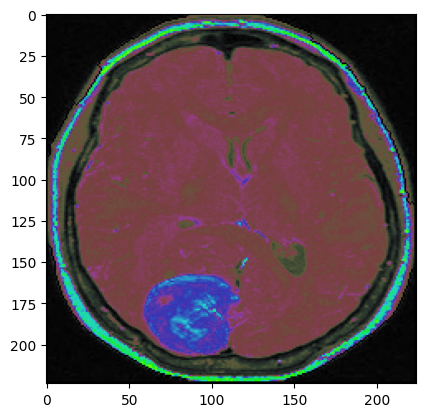

In [45]:
 
    img=uploaded_file
    Img = np.array(img)
    curImg = np.array(img)
    gray = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
    [ret, thresh] = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
    curImg = opening

    # sure background area
    sure_bg = cv.dilate(curImg, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv.distanceTransform(curImg, cv.DIST_L2, 5)
    [ret, sure_fg] = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Find unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg, sure_fg)

    # Marker labelling
    ret, markers = cv.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now mark the region of unknown with zero
    markers[unknown == 255] = 0
    markers = cv.watershed(Img, markers)
    Img[markers == -1] = [255, 0, 0]

    tumorImage = cv.cvtColor(Img, cv.COLOR_HSV2BGR)
    curImg = tumorImage
    plt.imshow(curImg)